# Random Forest Classifier - Bagging

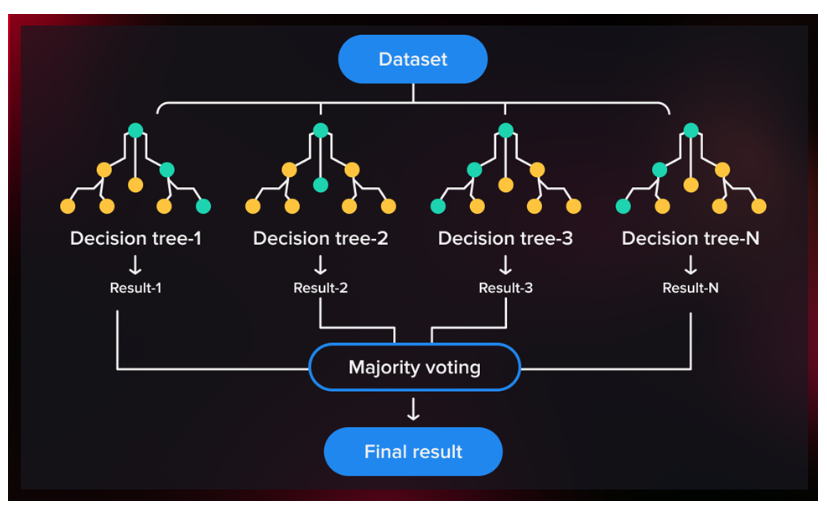

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Seperate X and Y(Drug)

In [6]:
x = df.drop(columns=['Drug'])
y = df[['Drug']]

In [7]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [8]:
y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [9]:
y.value_counts()

Drug 
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

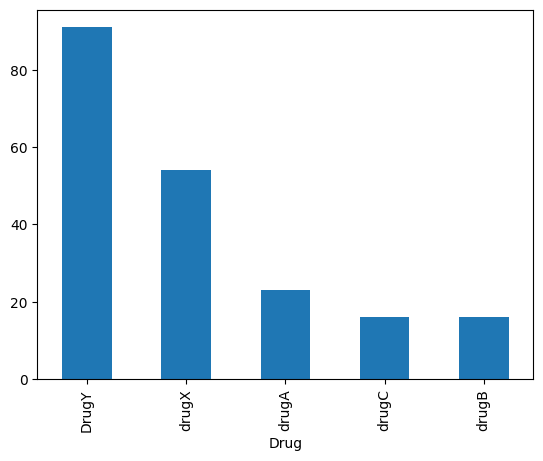

In [10]:
y['Drug'].value_counts().plot(kind='bar')

### Seperating categorical, continuous feature

In [11]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [12]:
cat

['Sex', 'BP', 'Cholesterol']

In [13]:
con

['Age', 'Na_to_K']

### Create a preprocessing pipeline for x

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe= Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                          ('scaler', StandardScaler())])

In [16]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [17]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [18]:
x_pre = pre.fit_transform(x)
x_pre

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,0.708057,-0.626917,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,0.465676,-0.859089,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,-1.291591,-0.286500,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Apply train test split

In [19]:
 from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre,y, test_size=0.3, random_state=21)

In [20]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
83,-0.382660,-0.660362,1.0,0.0,1.0,0.0,0.0,0.0,1.0
44,0.344485,-0.525888,1.0,0.0,0.0,0.0,1.0,0.0,1.0
115,0.405080,0.306766,0.0,1.0,1.0,0.0,0.0,1.0,0.0
184,-1.594568,2.928655,1.0,0.0,1.0,0.0,0.0,1.0,0.0
159,-0.625042,-0.438737,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
ytrain.head()

,Drug
83,drugA
44,drugX
115,DrugY
184,DrugY
159,drugX


In [22]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
144,-0.322065,-0.891007,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9,-0.079683,0.455672,0.0,1.0,0.0,1.0,0.0,0.0,1.0
17,-0.079683,-0.293162,0.0,1.0,1.0,0.0,0.0,1.0,0.0
20,0.768653,0.422366,0.0,1.0,0.0,1.0,0.0,0.0,1.0
45,1.314011,-1.107081,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [23]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


In [24]:
xtrain.shape

(140, 9)

In [25]:
xtest.shape

(60, 9)

### Create a Random Forest model

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_split=3, min_samples_leaf=3, criterion='entropy')
model.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=1)

In [27]:
model.score(xtrain,ytrain)

0.4928571428571429